In [ ]:
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import numpy as np
f = open("ECG.txt", "r") # ecg file
signal = (f.read()).split(" ")
signal = [float(value) for value in signal if value != '']
print(len(signal))

let's see some fourier transforms

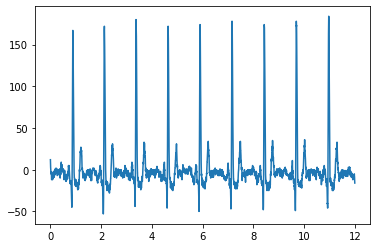

In [ ]:
Ts = 1.0 / 600 # sampling frequency = 600 Hz
N = 600 * 12 # number of points in 12s
signalRoi = signal[24480:(24480 + N)]
x = Ts*np.arange(N)
plt.plot(x, signalRoi)

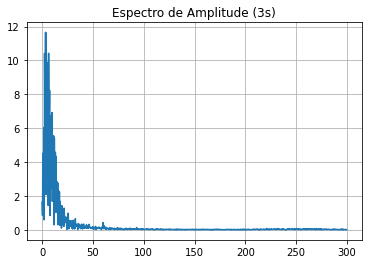

In [ ]:
N = 600 * 3 # number of points in 3s
signalRoi = signal[24480:(24480 + N)]
yf = fft(signalRoi)
xf = fftfreq(N, Ts)[:N//2]
plt.title('FFT (3s)')
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

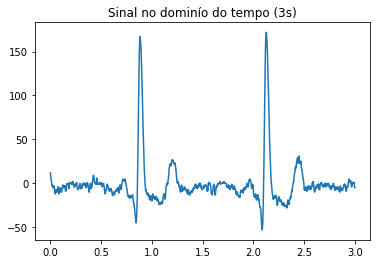

In [ ]:
plt.title('Time domain (3s)')
plt.plot(x[0:N], signalRoi)

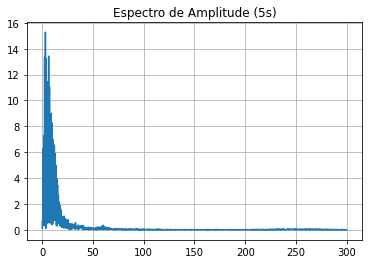

In [ ]:
N = 600 * 5 # number of points in 5s
signalRoi = signal[24480:(24480 + N)]
yf = fft(signalRoi)
xf = fftfreq(N, Ts)[:N//2] 
plt.title('FFT (5s)')
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

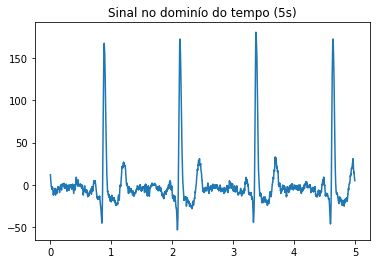

In [ ]:
plt.title('Time domain (5s)')
plt.plot(x[0:N], signalRoi)

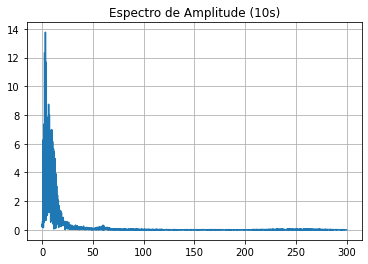

In [ ]:
N = 600 * 10 # number of points in 10s
signalRoi = signal[24480:(24480 + N)]
yf = fft(signalRoi)
xf = fftfreq(N, Ts)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT (10s)')
plt.grid()
plt.show()

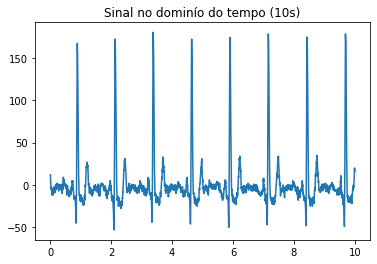

In [ ]:
plt.title('Time domain (10s)')
plt.plot(x[0:N], signalRoi)

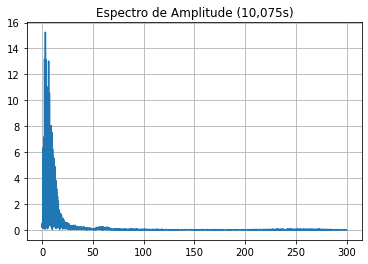

In [ ]:
N = 6045 # number of points in 10,075s
signalRoi = signal[24480:(24480 + N)]
yf = fft(signalRoi)
xf = fftfreq(N, Ts)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT (10,075s)')
plt.grid()
plt.show()

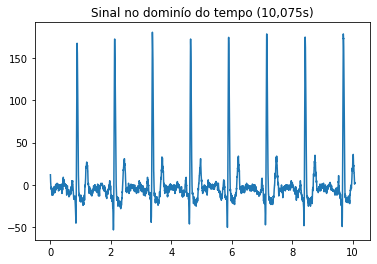

In [ ]:
plt.title('Time domain (10,075s)')
plt.plot(x[0:N], signalRoi)

Using this article http://www.jscholaronline.org/articles/JBER/Signal-Processing.pdf, we can filter out four types of noise:

*   Baseline Wander: Usually caused by patient movement and breathing. The frequencies are low, the article mentions around 0.5 Hz and 0.6 Hz. For this I will use a high-pass filter for 0.6 Hz (as it is a very small variation, it will not affect the choice).
*   Powerline interferance: Noise caused by the electrical network. The article mentions the use of the "Notch Filter" for 50 Hz or 60 Hz. This frequency depends from country to country, for Brazil it is around 60 Hz, which is consistent with the frequency spectrum, which has an amplitude of 60 Hz much greater than 50 Hz, as shown in the graph below.
*   EMG Noise: Noise caused by muscle activity. The signal becomes "darker" in some parts and the frequency is higher. In the base article and in another (https://core.ac.uk/download/pdf/53188749.pdf) they suggest the use of low-pass filters around 100 Hz.
*   Electrode Motion Artifacts: Noise caused by changes in skin impedance in the electrode region. It is fixed using adaptive filters and will not be implemented because i want to do a frequency analysis.


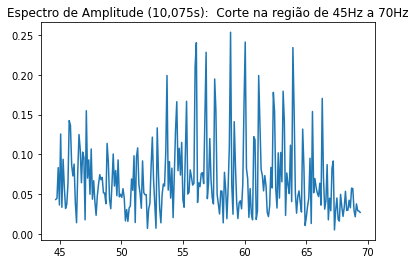

In [ ]:
plt.title('FFT (10,075s):  45Hz - 70Hz')
plt.plot(xf[450:700], 2.0/N * np.abs(yf[0:N//2][450:700]))

In [ ]:
# Notch Filter: 60 Hz
#  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html
from scipy import signal as sig

fs = 600.0  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = sig.iirnotch(f0, Q, fs)

In [ ]:
N = 600 * 10 # number of points in 10s
signalRoi = signal[24480:(24480 + N)]
yf = fft(signalRoi)
xf = fftfreq(N, Ts)

In [ ]:
def ecg_filter(sinal, freq_1 = 0.6, freq_2 = 100):
  signal_filter = []
  xf = fftfreq(N, Ts)
  for i in range(0, len(xf)):
    if (xf[i] > freq_1 and xf[i] < freq_2):
      signal_filter.append(sinal[i])
    else:
      signal_filter.append(0)
  sf = sig.filtfilt(b, a, signal_filter)
  return sf

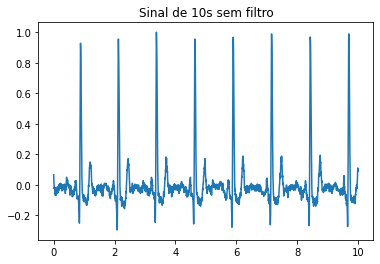

In [ ]:
plt.title('Signal (10s) before filter - Time Domain')
s_norm = signalRoi/np.max(signalRoi)
plt.plot(x[0:N], s_norm)

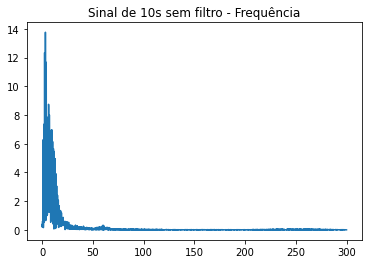

In [ ]:
plt.title('Signal (10s) before filter - Frequency Domain')
xf = fftfreq(N, Ts)[:N//2] 
plt.plot(xf, 2.0/N * np.abs(fft(signalRoi)[0:N//2]))

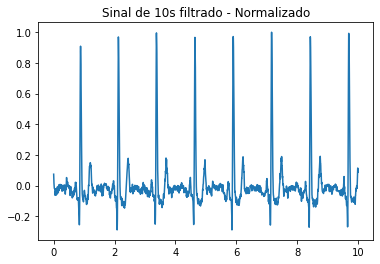

In [ ]:
yf = fft(signalRoi)
plt.title('Signal (10s) after filter - Time Domain [0,1]')
sf_norm = np.real(ifft(ecg_filter(yf)))/np.max(np.real(ifft(ecg_filter(yf))))
plt.plot(x[0:N], sf_norm)

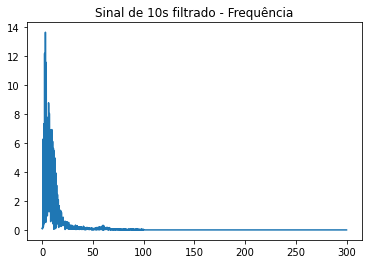

In [ ]:
plt.title('Signal (10s) after filter - Frequency Domain [0,1]')
xf = fftfreq(N, Ts)[:N//2] 
plt.plot(xf, 2.0/N * np.abs(ecg_filter(yf)[0:N//2]))

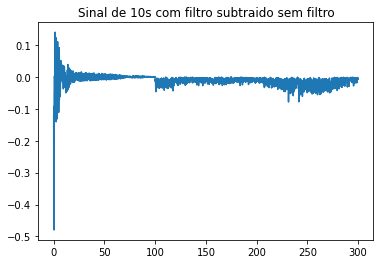

In [ ]:
plt.title('Difference beetween signal (10s) before/after filter')
xf = fftfreq(N, Ts)[:N//2]
plt.plot(xf, 2.0/N * np.abs(ecg_filter(yf)[0:N//2]) - 2.0/N * np.abs((yf)[0:N//2]))

Comparing the graphs in the 10s interval, it is possible to see that the darker regions of the unfiltered signal (EMG Noise) became slightly lighter in the filtered. To better visualize the difference, we will plot only a part of the windowing.

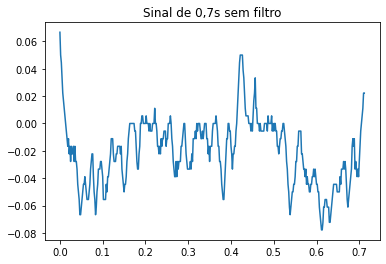

In [ ]:
plt.title('Signal (0,7s) before filter - Time Domain')
plt.plot(x[0:N//14], s_norm[0:N//14])

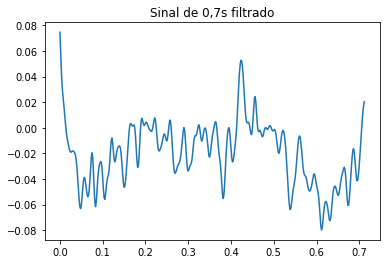

In [ ]:
plt.title('Signal (0,7s) after filter - Time Domain')
plt.plot(x[0:N//14], sf_norm[0:N//14])

In the graphs corresponding to the initial 0.7s of the 10s windowing, the filtering difference is much more noticeable. Now I will filter the entire signal with a 10s mobile windowing.

In [ ]:
N = 600 * 10
filter_signal = []
for i in range(0, len(signal), N):
  window = signal[i:(i + N)]
  window_freq = fft(window)
  window_filter = np.real(ifft(ecg_filter(window_freq)))
  for j in window_filter:
    filter_signal.append(j)

Now I will cut the signal into random parts to demonstrate the filtering effect:

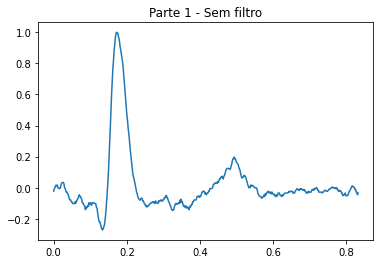

In [ ]:
from random import randrange
num = randrange(len(signal) - N)
plt.title('1 - before filter')
plt.plot(x[0:500], signal[num:(num+500)]/np.max(signal[num:(num+500)]))

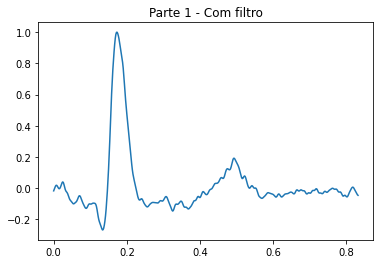

In [ ]:
plt.title('1 - after filter')
plt.plot(x[0:500], filter_signal[num:(num+500)]/np.max(filter_signal[num:(num+500)]))

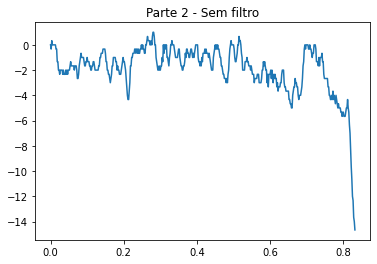

In [ ]:
num = randrange(len(signal) - N)
plt.title('2 - before filtro')
plt.plot(x[0:500], signal[num:(num+500)]/np.max(signal[num:(num+500)]))

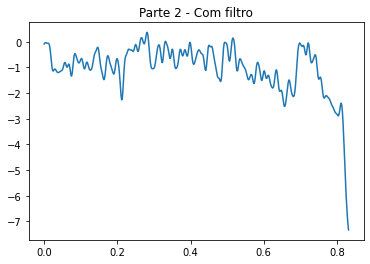

In [ ]:
plt.title('2 - after filter')
plt.plot(x[0:500], filter_signal[num:(num+500)]/np.max(filter_signal[num:(num+500)]))

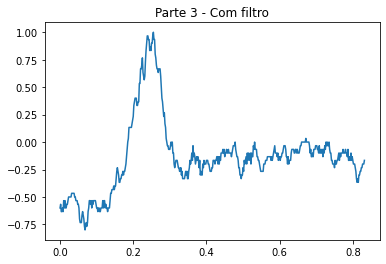

In [ ]:
num = randrange(len(signal) - N)
plt.title('3 - before filter')
plt.plot(x[0:500], signal[num:(num+500)]/np.max(signal[num:(num+500)]))

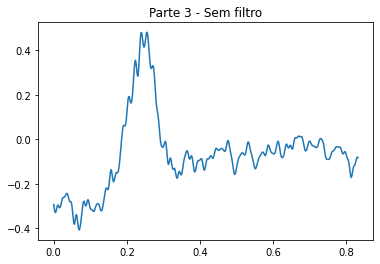

In [ ]:
plt.title('3 - afilter filtro')
plt.plot(x[0:500], filter_signal[num:(num+500)]/np.max(filter_signal[num:(num+500)]))